In [37]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls","./input"]).decode("utf-8"))

Sign-language-digits-dataset
column_2C_weka.csv
column_3C_weka.csv
combats.csv
pokemon.csv
sign-language-digits-dataset.zip
tests.csv



(-0.5, 63.5, 63.5, -0.5)

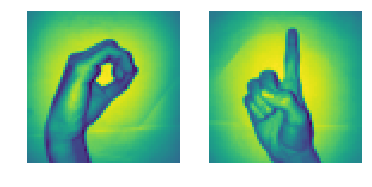

In [38]:
#データをロードする
x_l = np.load('./input/Sign-language-digits-dataset/X.npy')
y_l = np.load('./input/Sign-language-digits-dataset/Y.npy')
img_size = 64
plt.subplot(1,2,1)
#
plt.imshow(x_l[260].reshape(img_size,img_size))
#軸を表示しない
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [39]:
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z,o),axis = 0).reshape(X.shape[0],1)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (410, 64, 64)
Y shape: (410, 1)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [41]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [42]:
#サイズがこれだと言うことを覚えておく
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [43]:
#多分使わない。
def dummy(parameter):
    dummy_parameter = parameter +5
    return dummy_parameter
result = dummy(3)

#重みとバイアスの初期化
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

In [44]:
#シグモイド関数（活性化関数）
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head


In [45]:
#FP(コストの算出)
def forward_propagation(w,b,x_train,y_train):
    z =np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    return cost


In [46]:
#BP（コストの算出。こっちを使う）
def forward_backward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight":derivative_weight, "derivative_bias": derivative_bias}
    return cost,gradients

In [47]:
#パラメータの更新
def update(w,b,x_train,y_train,learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(number_of_iterarion):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        #更新
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i:%f" %(i,cost))
            
    parameters = {"weight":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
        

In [48]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    return Y_prediction

                

Cost after iteration 0:14.014222
Cost after iteration 10:2.544689
Cost after iteration 20:2.577950
Cost after iteration 30:2.397999
Cost after iteration 40:2.185019
Cost after iteration 50:1.968348
Cost after iteration 60:1.754195
Cost after iteration 70:1.535079
Cost after iteration 80:1.297567
Cost after iteration 90:1.031919
Cost after iteration 100:0.737019
Cost after iteration 110:0.441355
Cost after iteration 120:0.252278
Cost after iteration 130:0.205168
Cost after iteration 140:0.196168


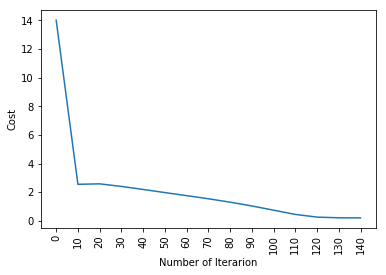

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [50]:
def logistic_regression(x_train, y_train,x_test,y_test,learning_rate ,num_iterations):
    dimension = x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters,gradients,cost_list = update(w,b,x_train,y_train,learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)
    

In [51]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(random_state = 42,max_iter = 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


In [52]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [53]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [54]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [55]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [56]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [57]:
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.300833
Cost after iteration 100: 0.299997
Cost after iteration 200: 0.285311
Cost after iteration 300: 0.244551
Cost after iteration 400: 0.201812
Cost after iteration 500: 0.164469
Cost after iteration 600: 0.136017
Cost after iteration 700: 0.114843
Cost after iteration 800: 0.098675
Cost after iteration 900: 0.086012
Cost after iteration 1000: 0.075958
Cost after iteration 1100: 0.067796
Cost after iteration 1200: 0.060991
Cost after iteration 1300: 0.055201
Cost after iteration 1400: 0.050141
Cost after iteration 1500: 0.045552
Cost after iteration 1600: 0.041286
Cost after iteration 1700: 0.037460
Cost after iteration 1800: 0.034241
Cost after iteration 1900: 0.031583
Cost after iteration 2000: 0.029351
Cost after iteration 2100: 0.027437
Cost after iteration 2200: 0.025768
Cost after iteration 2300: 0.024296
Cost after iteration 2400: 0.022986


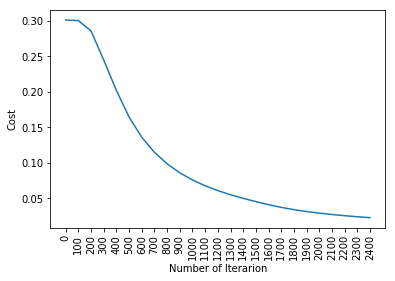

train accuracy: 99.71264367816092 %
test accuracy: 96.7741935483871 %


In [58]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

In [59]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [62]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.


Epoch 1/100
232/232 [==============================] - 0s 2ms/step - loss: 0.6932 - acc: 0.5086
Epoch 2/100
232/232 [==============================] - 0s 120us/step - loss: 0.6929 - acc: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 100us/step - loss: 0.6927 - acc: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 115us/step - loss: 0.6926 - acc: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 104us/step - loss: 0.6925 - acc: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 108us/step - loss: 0.6924 - acc: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 102us/step - loss: 0.6922 - acc: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 95us/step - loss: 0.6921 - acc: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 145us/step - loss: 0.6920 - acc: 0.5431
Epoch 10/100
232/232 [==============================] - 0s 137us/step - loss: 0.6918 - acc: 0.5431
Epoch 11/100
232/232 [

232/232 [==============================] - 0s 107us/step - loss: 0.6896 - acc: 0.5431
Epoch 85/100
232/232 [==============================] - 0s 104us/step - loss: 0.6895 - acc: 0.5431
Epoch 86/100
232/232 [==============================] - 0s 159us/step - loss: 0.6895 - acc: 0.5431
Epoch 87/100
232/232 [==============================] - 0s 110us/step - loss: 0.6896 - acc: 0.5431
Epoch 88/100
232/232 [==============================] - 0s 114us/step - loss: 0.6895 - acc: 0.5431
Epoch 89/100
232/232 [==============================] - 0s 112us/step - loss: 0.6895 - acc: 0.5431
Epoch 90/100
232/232 [==============================] - 0s 108us/step - loss: 0.6895 - acc: 0.5431
Epoch 91/100
232/232 [==============================] - 0s 112us/step - loss: 0.6895 - acc: 0.5431
Epoch 92/100
232/232 [==============================] - 0s 149us/step - loss: 0.6895 - acc: 0.5431
Epoch 93/100
232/232 [==============================] - 0s 136us/step - loss: 0.6895 - acc: 0.5431
Epoch 94/100
232/232 [=

232/232 [==============================] - 0s 106us/step - loss: 0.6923 - acc: 0.5216
Epoch 67/100
232/232 [==============================] - 0s 94us/step - loss: 0.6923 - acc: 0.5216
Epoch 68/100
232/232 [==============================] - 0s 111us/step - loss: 0.6923 - acc: 0.5216
Epoch 69/100
232/232 [==============================] - 0s 93us/step - loss: 0.6922 - acc: 0.5216
Epoch 70/100
232/232 [==============================] - 0s 110us/step - loss: 0.6923 - acc: 0.5216
Epoch 71/100
232/232 [==============================] - 0s 119us/step - loss: 0.6922 - acc: 0.5216
Epoch 72/100
232/232 [==============================] - 0s 158us/step - loss: 0.6922 - acc: 0.5216
Epoch 73/100
232/232 [==============================] - 0s 119us/step - loss: 0.6922 - acc: 0.5216
Epoch 74/100
232/232 [==============================] - 0s 131us/step - loss: 0.6922 - acc: 0.5216
Epoch 75/100
232/232 [==============================] - 0s 124us/step - loss: 0.6922 - acc: 0.5216
Epoch 76/100
232/232 [===

232/232 [==============================] - 0s 91us/step - loss: 0.3959 - acc: 0.9224
Epoch 49/100
232/232 [==============================] - 0s 118us/step - loss: 0.3884 - acc: 0.9267
Epoch 50/100
232/232 [==============================] - 0s 97us/step - loss: 0.3878 - acc: 0.9310
Epoch 51/100
232/232 [==============================] - 0s 122us/step - loss: 0.3781 - acc: 0.9267
Epoch 52/100
232/232 [==============================] - 0s 122us/step - loss: 0.3753 - acc: 0.9397
Epoch 53/100
232/232 [==============================] - 0s 137us/step - loss: 0.3714 - acc: 0.9310
Epoch 54/100
232/232 [==============================] - 0s 148us/step - loss: 0.3726 - acc: 0.9397
Epoch 55/100
232/232 [==============================] - 0s 130us/step - loss: 0.3638 - acc: 0.9181
Epoch 56/100
232/232 [==============================] - 0s 165us/step - loss: 0.3594 - acc: 0.9440
Epoch 57/100
232/232 [==============================] - 0s 118us/step - loss: 0.3551 - acc: 0.9440
Epoch 58/100
232/232 [===